<h1 style=\"text-align: center; font-size: 50px;\">✍️ Handwritten digit classification with keras </h1>
This notebook shows how to do a simple image classification using TensorFlow and MNIST(Modified National Institute of Standards and Technology) database of handwritten digits.


## Notebook Overview
- Start Execution
- Install and Import Libraries
- Configure Settings
- Loading and Preprocessing the Data
- Building Model
- Training the Model


## Start Execution

In [1]:
import logging
import time

# Configure logger
logger: logging.Logger = logging.getLogger("run_workflow_logger")
logger.setLevel(logging.INFO)
logger.propagate = False  # Prevent duplicate logs from parent loggers

# Set formatter
formatter: logging.Formatter = logging.Formatter(
    fmt="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S"
)

# Configure and attach stream handler
stream_handler: logging.StreamHandler = logging.StreamHandler()
stream_handler.setFormatter(formatter)
logger.addHandler(stream_handler)

In [2]:
start_time = time.time()  

logger.info("Notebook execution started.")

2025-08-05 14:13:25 - INFO - Notebook execution started.


## Install and Import Libraries

In [3]:
# ------------------------ System Utilities ------------------------
import warnings                         
import logging  
import datetime
from PIL import Image
import base64
from io import BytesIO

# ------------------------ Data manipulation libraries ------------------------
import pandas as pd                     
import numpy as np


# ------------------------ Visualization Libraries ------------------------ 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ------------------------ Deep learning framework ------------------------
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping


2025-08-05 14:13:27.663908: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-05 14:13:27.846019: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754403207.939388     319 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754403207.964727     319 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-05 14:13:28.146550: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Configure Settings

In [4]:
# Suppress Python warnings
warnings.filterwarnings("ignore")

## Loading and Preprocessing the Data

The MNIST dataset is divided into two categories: training and testing sets. The load_data() function splits into x_train and y_train, coitaining images and their labels, for trainining the model. The other part, x_test and y_test, hold images and their labels for testing the model.

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# One-hot encode
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

Reshape to include channel dimension (in this case, 1 channel)

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')/255

In [8]:
x_test = x_test.reshape(10000,28,28,1).astype('float32')/255

## Building the Model

In [9]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.summary()

I0000 00:00:1754403213.298489     319 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 45689 MB memory:  -> device: 0, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:21:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # Add in additional metrics https://keras.io/metrics/

In [11]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [12]:
history = model.fit(x_train,y_cat_train,epochs=4,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/4


I0000 00:00:1754403218.501579     436 service.cc:148] XLA service 0x7f698c0048e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754403218.501908     436 service.cc:156]   StreamExecutor device (0): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
2025-08-05 14:13:38.536320: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754403218.654185     436 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-08-05 14:13:39.085604: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_200', 4 bytes spill stores, 4 bytes spill loads



  53/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5641 - loss: 1.4172

I0000 00:00:1754403220.457082     436 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9129 - loss: 0.2896 - val_accuracy: 0.9821 - val_loss: 0.0537
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9851 - loss: 0.0491 - val_accuracy: 0.9867 - val_loss: 0.0384
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9912 - loss: 0.0305 - val_accuracy: 0.9864 - val_loss: 0.0390
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9937 - loss: 0.0202 - val_accuracy: 0.9862 - val_loss: 0.0407


In [13]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test,y_cat_test, verbose = 0)
logger.info(f"test loss: {test_loss}")
logger.info(f"test accuracy: {test_accuracy}")

2025-08-05 14:14:13 - INFO - test loss: 0.04067501425743103
2025-08-05 14:14:13 - INFO - test accuracy: 0.9861999750137329


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
label:[7], predicted class: 7


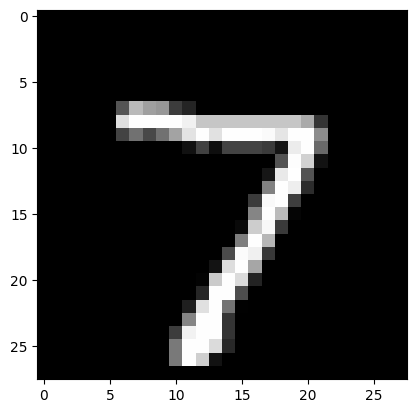

In [14]:
pred = model.predict(x_test[:1])
pred_cls =np.argmax(pred)
print(f'label:{y_test[:1]}, predicted class: {pred_cls}')
image = x_test[:1]
plt.imshow(image.squeeze(), cmap= 'gray')

In [15]:
end_time: float = time.time()
elapsed_time: float = end_time - start_time
elapsed_minutes: int = int(elapsed_time // 60)
elapsed_seconds: float = elapsed_time % 60

logger.info(f"⏱️ Total execution time: {elapsed_minutes}m {elapsed_seconds:.2f}s")
logger.info("✅ Notebook execution completed successfully.")

2025-08-05 14:14:14 - INFO - ⏱️ Total execution time: 0m 48.53s
2025-08-05 14:14:14 - INFO - ✅ Notebook execution completed successfully.


Built with ❤️ using [**Z by HP AI Studio**](https://zdocs.datascience.hp.com/docs/aistudio/overview).